In [36]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt

class TSPSimulatedAnnealing:
    def __init__(self, file_path, initial_temperature=1000, cooling_rate=0.99, max_iterations=1000):
        self.cities = self.load_data(file_path)
        self.num_cities = len(self.cities)
        self.initial_temperature = initial_temperature
        self.cooling_rate = cooling_rate
        self.max_iterations = max_iterations
        self.best_solution = None
        self.best_cost = None
        self.convergence = []

    def load_data(self, file_path):
        data = pd.read_csv(file_path)
        return data.values

    def distance(self, city1, city2):
        return np.linalg.norm(city1 - city2)

    def initialize_solution(self):
        return np.random.permutation(self.num_cities)

    def get_neighbor(self, solution):
        neighbor = solution.copy()
        i, j = random.sample(range(len(solution)), 2)
        neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
        return neighbor

    def objective_function(self, solution):
        total_distance = 0
        for i in range(len(solution) - 1):
            total_distance += self.distance(self.cities[solution[i]], self.cities[solution[i + 1]])
        total_distance += self.distance(self.cities[solution[-1]], self.cities[solution[0]])
        return total_distance

    def acceptance_probability(self, old_cost, new_cost, temperature):
        delta = abs(old_cost - new_cost)
        if new_cost < old_cost:
            return 1
        else:
            return math.exp(-delta / temperature)

    def temperature_schedule(self, iteration):
        return self.initial_temperature * (self.cooling_rate ** iteration)

    def solve(self):
        current_solution = self.initialize_solution()
        self.best_solution = current_solution.copy()
        current_cost = self.objective_function(current_solution)
        self.best_cost = current_cost
        temperature = self.initial_temperature
        iteration = 0

        while iteration < self.max_iterations:
            neighbor_solution = self.get_neighbor(current_solution)
            neighbor_cost = self.objective_function(neighbor_solution)
            if random.random() < self.acceptance_probability(current_cost, neighbor_cost, temperature):
                current_solution = neighbor_solution
                current_cost = neighbor_cost
                if current_cost < self.best_cost:
                    self.best_solution = current_solution
                    self.best_cost = current_cost
            temperature = self.temperature_schedule(iteration)
            iteration += 1
            self.convergence.append(self.best_cost)

    def plot_tour(self):
        plt.figure(figsize=(8, 8))
        plt.scatter(self.cities[:, 0], self.cities[:, 1], c='blue')
        plt.plot(self.cities[self.best_solution][:, 0], self.cities[self.best_solution][:, 1], c='red', linestyle='-', linewidth=1)
        plt.title("TSP Solution using Simulated Annealing")
        plt.xlabel("X Coordinate")
        plt.ylabel("Y Coordinate")
        plt.grid(True)
        plt.show()

    def plot_convergence(self):
        plt.figure(figsize=(8, 6))
        plt.plot(self.convergence, c='green')
        plt.title("Convergence Plot")
        plt.xlabel("Iteration")
        plt.ylabel("Total Distance")
        plt.grid(True)
        plt.show()

    def display_results(self):
        print("Best solution:", self.best_solution)
        print("Best cost:", self.best_cost)


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class ParticleSwarmOptimization:
    def __init__(self, cities_file, num_particles=100, num_iterations=100, c1=2.0, c2=2.0, w=0.5):
        self.df = pd.read_csv(cities_file)
        self.cities = self.df.values
        self.num_particles = num_particles
        self.num_iterations = num_iterations
        self.c1 = c1
        self.c2 = c2
        self.w = w
        self.swarm = np.array([np.random.permutation(len(self.cities)) for _ in range(self.num_particles)])
        self.velocities = np.zeros_like(self.swarm)
        self.global_best_solution = None
        self.global_best_fitness = np.inf
        self.best_fitnesses = []
        self.best_route = []

    def calculate_distance(self, solution):
        distance = 0
        for i in range(len(solution) - 1):
            city1 = self.cities[solution[i]]
            city2 = self.cities[solution[i + 1]]
            distance += np.linalg.norm(city1 - city2)  # Euclidean distance
        return distance

    def optimize(self):
        for iteration in range(self.num_iterations):
            for i in range(self.num_particles):
                fitness = self.calculate_distance(self.swarm[i])
                if fitness < self.global_best_fitness:
                    self.global_best_solution = self.swarm[i].copy()
                    self.global_best_fitness = fitness
                    self.best_route = np.append(self.global_best_solution, self.global_best_solution[0])

                # Update Velocity
                r1 = np.random.random(len(self.cities))
                r2 = np.random.random(len(self.cities))
                self.velocities[i] = self.w * self.velocities[i] + \
                                      self.c1 * r1 * (self.swarm[i] - self.swarm[i]) + \
                                      self.c2 * r2 * (self.global_best_solution - self.swarm[i])

                # Update Position
                self.swarm[i] = np.argsort(self.swarm[i] + self.velocities[i])

            self.best_fitnesses.append(self.global_best_fitness)

    def plot_results(self):
        # Print Distance of Best Route
        print("Distance of Best Route:", self.global_best_fitness)

    # Print Best Route
        print("Best Route:")
        print(self.best_route)

    # Visualize Distance Changes and Best Route
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.plot(self.best_fitnesses, marker='o', linestyle='-')
        plt.xlabel('Iteration')
        plt.ylabel('Best Distance')
        plt.title('Evolution of Best Distance')

        plt.subplot(1, 2, 2)
        plt.scatter(self.cities[:, 0], self.cities[:, 1], color='blue', label='Cities')
        plt.plot(self.cities[self.best_route, 0], self.cities[self.best_route, 1], color='red', linestyle='-',
             linewidth=2.0, label='Best Route')
    
    # Add labels to cities without indices
        for city in self.cities:
            plt.text(city[0], city[1], '', fontsize=8, verticalalignment='center', horizontalalignment='center')
    
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.title('Best Route Found')
        plt.legend()
        plt.tight_layout()
        plt.show()


Distance of Best Route: 495.1537806196527
Best Route:
[615 216 515 148  65 929 377 439 753 144 698 107 175 302 367 208 970 890
 863 569 938 654 918 340  69 703 260 282 405 680 593 214 467 811 988 741
 700 588 896 446 289 394 833 359  35 745 683 993 220 816 928 213 185 386
 690 556  39 878 803 224  15 146 630 163 431 492   7  97 306  75  57 849
 200 820 867 853 998 638 958 344 176 283 830 172 149 463 609 512 770   5
 206 337 525 313 269  41   9 425 416 957 478 132   0 415 229 419 642 827
 533 597 668  53 852 518 110 892 392 399 284 375 596 854 884 530 836 772
  31 166 687 877 301 503 137 434 738 267 493 389 566 769 325 887 428  20
 720 317 660 834 767 986 509  51 724 397  80 470 721  84  29 796 898 528
 403 866 664 995 464 580 813 455 466 732  88 259 708 182  52 576 996 350
 933 591 354  56  13 100 761 658 846 264 432 688 261 328 202 607 716 499
 178 255 561 332 549 911 315 600 436 546 627 181 764 143 456 152 147 250
  87 787 165 228 869 955 669 714 572 450 625 155 345 410 985 807 411  

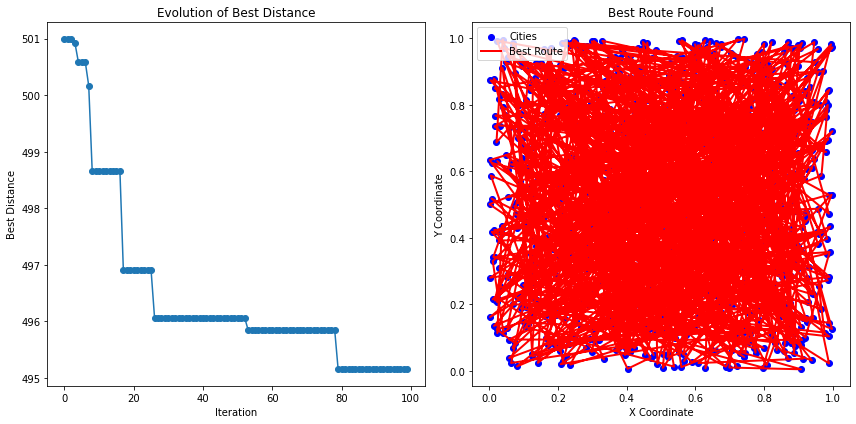

In [ ]:
import tkinter as tk
from tkinter import messagebox


class AlgorithmGUI:
    def __init__(self, master):
        self.master = master
        master.title("TSP Algorithm Selector")

        self.algorithm_label = tk.Label(master, text="Select Algorithm:")
        self.algorithm_label.pack()

        self.algorithm_var = tk.StringVar()
        self.algorithm_var.set("PSO")  # Default selection
        self.algorithm_menu = tk.OptionMenu(master, self.algorithm_var, "PSO", "Simulated Annealing", command=self.show_parameters)
        self.algorithm_menu.pack()

        self.parameters_frame = tk.Frame(master)
        self.parameters_frame.pack()

        self.iterations_label = tk.Label(self.parameters_frame, text="Iterations:")
        self.iterations_entry = tk.Entry(self.parameters_frame)

        self.population_size_label = tk.Label(self.parameters_frame, text="Population Size:")
        self.population_size_entry = tk.Entry(self.parameters_frame)

        self.pbest_prob_label = tk.Label(self.parameters_frame, text="Pbest Probability:")
        self.pbest_prob_entry = tk.Entry(self.parameters_frame)

        self.gbest_prob_label = tk.Label(self.parameters_frame, text="Gbest Probability:")
        self.gbest_prob_entry = tk.Entry(self.parameters_frame)
        
        self.inertia_label = tk.Label(self.parameters_frame, text="inertia:")
        self.inertia_entry = tk.Entry(self.parameters_frame)


        self.initial_temp_label = tk.Label(self.parameters_frame, text="Initial Temperature:")
        self.initial_temp_entry = tk.Entry(self.parameters_frame)

        self.cooling_rate_label = tk.Label(self.parameters_frame, text="Cooling Rate:")
        self.cooling_rate_entry = tk.Entry(self.parameters_frame)

        self.max_iterations_label = tk.Label(self.parameters_frame, text="Max Iterations:")
        self.max_iterations_entry = tk.Entry(self.parameters_frame)

        self.run_button = tk.Button(master, text="Run Algorithm", command=self.run_algorithm)
        self.run_button.pack()

        # Initially show PSO parameters
        self.show_pso_parameters()

    def show_parameters(self, *args):
        algorithm = self.algorithm_var.get()
        if algorithm == "PSO":
            self.show_pso_parameters()
        elif algorithm == "Simulated Annealing":
            self.show_simulated_annealing_parameters()

    def show_pso_parameters(self):
        self.clear_parameters_frame()
        self.iterations_label.pack()
        self.iterations_entry.pack()
        self.population_size_label.pack()
        self.population_size_entry.pack()
        self.pbest_prob_label.pack()
        self.pbest_prob_entry.pack()
        self.gbest_prob_label.pack()
        self.gbest_prob_entry.pack()
        self.inertia_label.pack()
        self.inertia_entry.pack()

    def show_simulated_annealing_parameters(self):
        self.clear_parameters_frame()
        self.initial_temp_label.pack()
        self.initial_temp_entry.pack()
        self.cooling_rate_label.pack()
        self.cooling_rate_entry.pack()
        self.max_iterations_label.pack()
        self.max_iterations_entry.pack()

    def clear_parameters_frame(self):
        for widget in self.parameters_frame.winfo_children():
            widget.pack_forget()

    def run_algorithm(self):
        algorithm = self.algorithm_var.get()
        if algorithm == "PSO":
            iterations = int(self.iterations_entry.get())
            population_size = int(self.population_size_entry.get())
            pbest_probability = float(self.pbest_prob_entry.get())
            gbest_probability = float(self.gbest_prob_entry.get())
            inertia = float(self.inertia_entry.get())
            cities_file = "cities.csv"
        
        # Initialize PSO
            pso = ParticleSwarmOptimization(cities_file, num_particles=population_size, num_iterations=iterations, c1=pbest_probability, c2=gbest_probability, w=inertia)
        
        # Run PSO optimization
            pso.optimize()
        
        # Get the optimized solution
            final_route = pso.global_best_solution
            final_cost = pso.global_best_fitness
        
        # Print Distance of Best Route
            print("Distance of Best Route:", final_cost)
        
        # Print Best Route
            print("Best Route:")
            print(final_route)
        
        # Visualize the optimized route
            plt.figure(figsize=(12, 6))
            plt.subplot(1, 2, 1)
            plt.plot(pso.best_fitnesses, marker='o', linestyle='-')
            plt.xlabel('Iteration')
            plt.ylabel('Best Distance')
            plt.title('Evolution of Best Distance')

            plt.subplot(1, 2, 2)
            plt.scatter(pso.cities[:, 0], pso.cities[:, 1], color='blue', label='Cities')
            plt.plot(pso.cities[final_route, 0], pso.cities[final_route, 1], color='red', linestyle='-', linewidth=2.0, label='Best Route')
        
            for city in pso.cities:
                plt.text(city[0], city[1], '', fontsize=8, verticalalignment='center', horizontalalignment='center')
        
            plt.xlabel('X Coordinate')
            plt.ylabel('Y Coordinate')
            plt.title('Best Route Found')
            plt.legend()
            plt.tight_layout()
            plt.show()
        
        # Display final cost
            messagebox.showinfo("PSO Result", f"Final cost: {final_cost}")

        elif algorithm == "Simulated Annealing":
            initial_temperature = float(self.initial_temp_entry.get())
            cooling_rate = float(self.cooling_rate_entry.get())
            max_iterations = int(self.max_iterations_entry.get())

            tsp_solver = TSPSimulatedAnnealing("cities.csv", initial_temperature=initial_temperature, cooling_rate=cooling_rate, max_iterations=max_iterations)
            tsp_solver.solve()
            tsp_solver.plot_tour()
            tsp_solver.plot_convergence()
            tsp_solver.display_results()
        else:
            messagebox.showerror("Error", "Unknown algorithm selected!")

def main():
    root = tk.Tk()
    gui = AlgorithmGUI(root)
    root.mainloop()

if __name__ == "__main__":
    main()
